In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("powergrid_material_demand_latest.csv")

In [37]:
df.head()

,Project_ID,Location,Geographic_Region,Budget_Cr,Tower_Count,Substations_Count,Steel_Demand_Tons,Conductor_Demand_Km,Insulator_Demand_Nos,Transformer_Demand_Units,Tower_Type,Substation_Type,Terrain_Difficulty,Tax_Rate,Start_Year,Completion_Year,Line_Length_CKM,Transformation_Capacity_MVA
0,PROJ-2201,Bihar,Northern Plains,1833.0,1727,1,51903.042929,4134,259050,3,D/C 765 kV,AIS,Medium,12,2020,2023,689,2823
1,PROJ-8551,Delhi,Northern Plains,2351.0,2777,2,97195.000000,2916,66648,5,S/C 220 kV,AIS,Medium,18,2021,2024,972,4835
2,PROJ-5595,Rajasthan,Desert Plains,1283.0,846,2,25380.000000,888,17604,1,S/C 220 kV,GIS,Medium,18,2018,2020,296,500
3,PROJ-7077,Delhi,Northern Plains,1445.0,1058,2,31740.000000,2538,76176,1,D/C 400 kV,Hybrid,Low,12,2014,2018,423,1601
4,PROJ-5024,Gujarat,Desert Plains,1242.0,1540,2,46200.000000,1386,36960,4,S/C 220 kV,AIS,High,12,2015,2017,462,3399


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5775 entries, 0 to 5774
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project_ID                   5775 non-null   object 
 1   Location                     5775 non-null   object 
 2   Geographic_Region            5775 non-null   object 
 3   Budget_Cr                    5775 non-null   float64
 4   Tower_Count                  5775 non-null   int64  
 5   Substations_Count            5775 non-null   int64  
 6   Steel_Demand_Tons            5775 non-null   float64
 7   Conductor_Demand_Km          5775 non-null   int64  
 8   Insulator_Demand_Nos         5775 non-null   int64  
 9   Transformer_Demand_Units     5775 non-null   int64  
 10  Tower_Type                   5775 non-null   object 
 11  Substation_Type              5775 non-null   object 
 12  Terrain_Difficulty           5775 non-null   object 
 13  Tax_Rate          

In [39]:
df.describe(include='all')

,Project_ID,Location,Geographic_Region,Budget_Cr,Tower_Count,Substations_Count,Steel_Demand_Tons,Conductor_Demand_Km,Insulator_Demand_Nos,Transformer_Demand_Units,Tower_Type,Substation_Type,Terrain_Difficulty,Tax_Rate,Start_Year,Completion_Year,Line_Length_CKM,Transformation_Capacity_MVA
count,5775,5775,5775,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775,5775,5775,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
unique,5775,10,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN
top,PROJ-2201,Raipur,Hilly Forests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D/C 400 kV,GIS,Medium,NaN,NaN,NaN,NaN,NaN
freq,1,613,2272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2040,1957,1954,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1624.878489,2093.039827,1.672900,66391.663671,3619.781299,156978.477056,2.703203,NaN,NaN,NaN,15.038961,2016.034459,2019.036364,719.236710,2547.376797
std,NaN,NaN,NaN,517.942418,1412.596202,0.623563,45442.395720,2678.591222,145352.238485,1.158341,NaN,NaN,NaN,3.000007,3.741846,3.836645,469.268449,1313.010887
min,NaN,NaN,NaN,803.000000,412.000000,1.000000,12960.000000,495.000000,10086.000000,1.000000,NaN,NaN,NaN,12.000000,2010.000000,2012.000000,163.000000,500.000000
25%,NaN,NaN,NaN,1233.000000,1182.000000,1.000000,36885.500000,1836.000000,54140.000000,2.000000,NaN,NaN,NaN,12.000000,2013.000000,2016.000000,427.000000,1453.000000
50%,NaN,NaN,NaN,1469.000000,1610.000000,2.000000,50820.000000,2808.000000,115172.000000,3.000000,NaN,NaN,NaN,18.000000,2016.000000,2019.000000,552.000000,2891.000000
75%,NaN,NaN,NaN,2028.000000,2414.000000,2.000000,77147.000000,4377.000000,200277.000000,4.000000,NaN,NaN,NaN,18.000000,2019.000000,2022.000000,871.000000,3190.000000


In [40]:
df.isna().sum()

Project_ID                     0
Location                       0
Geographic_Region              0
Budget_Cr                      0
Tower_Count                    0
Substations_Count              0
Steel_Demand_Tons              0
Conductor_Demand_Km            0
Insulator_Demand_Nos           0
Transformer_Demand_Units       0
Tower_Type                     0
Substation_Type                0
Terrain_Difficulty             0
Tax_Rate                       0
Start_Year                     0
Completion_Year                0
Line_Length_CKM                0
Transformation_Capacity_MVA    0
dtype: int64

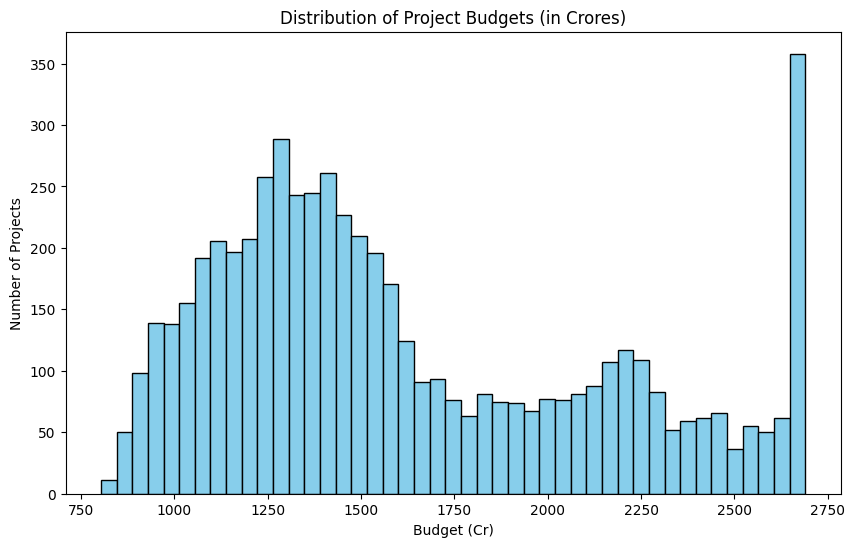

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Budget_Cr'], bins=45, color='skyblue', edgecolor='black')
plt.title('Distribution of Project Budgets (in Crores)')
plt.xlabel('Budget (Cr)')
plt.ylabel('Number of Projects')
plt.show()

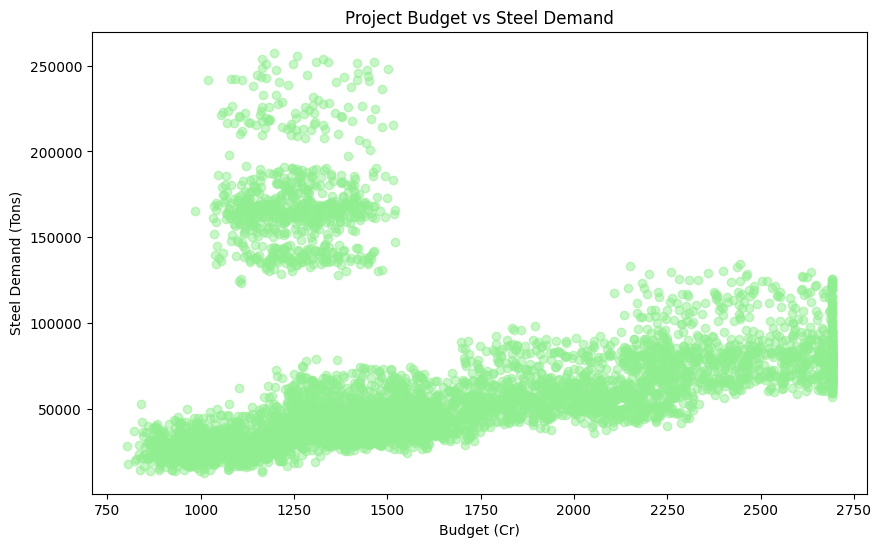

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(df['Budget_Cr'], df['Steel_Demand_Tons'], alpha=0.5, color='lightgreen')
plt.title('Project Budget vs Steel Demand')
plt.xlabel('Budget (Cr)')
plt.ylabel('Steel Demand (Tons)')
plt.show()

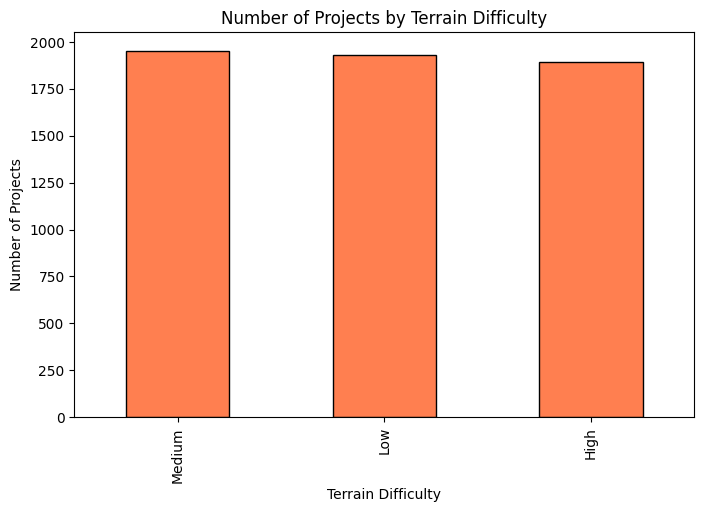

In [43]:
terrain_counts = df['Terrain_Difficulty'].value_counts()
plt.figure(figsize=(8,5))
terrain_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Projects by Terrain Difficulty')
plt.xlabel('Terrain Difficulty')
plt.ylabel('Number of Projects')
plt.show()

In [44]:
df.head()

,Project_ID,Location,Geographic_Region,Budget_Cr,Tower_Count,Substations_Count,Steel_Demand_Tons,Conductor_Demand_Km,Insulator_Demand_Nos,Transformer_Demand_Units,Tower_Type,Substation_Type,Terrain_Difficulty,Tax_Rate,Start_Year,Completion_Year,Line_Length_CKM,Transformation_Capacity_MVA
0,PROJ-2201,Bihar,Northern Plains,1833.0,1727,1,51903.042929,4134,259050,3,D/C 765 kV,AIS,Medium,12,2020,2023,689,2823
1,PROJ-8551,Delhi,Northern Plains,2351.0,2777,2,97195.000000,2916,66648,5,S/C 220 kV,AIS,Medium,18,2021,2024,972,4835
2,PROJ-5595,Rajasthan,Desert Plains,1283.0,846,2,25380.000000,888,17604,1,S/C 220 kV,GIS,Medium,18,2018,2020,296,500
3,PROJ-7077,Delhi,Northern Plains,1445.0,1058,2,31740.000000,2538,76176,1,D/C 400 kV,Hybrid,Low,12,2014,2018,423,1601
4,PROJ-5024,Gujarat,Desert Plains,1242.0,1540,2,46200.000000,1386,36960,4,S/C 220 kV,AIS,High,12,2015,2017,462,3399


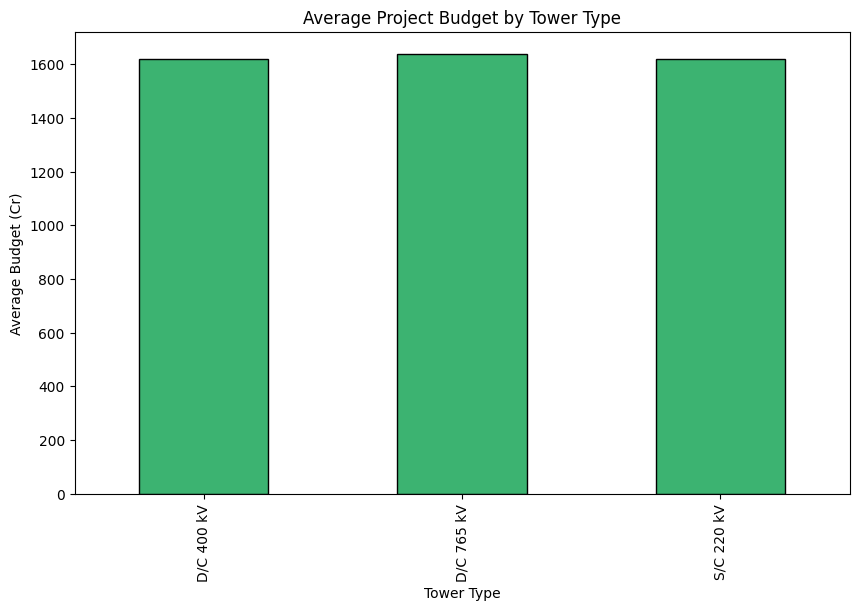

In [45]:
avg_budget_by_tower = df.groupby('Tower_Type')['Budget_Cr'].mean()
plt.figure(figsize=(10,6))
avg_budget_by_tower.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Average Project Budget by Tower Type')
plt.xlabel('Tower Type')
plt.ylabel('Average Budget (Cr)')
plt.show()